In [1]:
from backtestlib import *
from datetime import datetime,date
import pandas as pd
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
start_date_true= '2017-01-01' #期望开始时间
end_date= '2025-02-28'
# end_date = '2024-12-31'
# end_date = '2024-11-20'
transaction_fee_rate=0.0003 # 交易费率为0.03%
index_code = '000300.SH' # 指数代码
def int_index_to_datetime(df):
    df.index = pd.to_datetime(df.index, format='%Y%m%d')
    return df

def adj_date(df, start_date=start_date_true, end_date=end_date):
    try:
        return df[(df.index>=start_date) & (df.index<=end_date)]
    except:
        raise Exception('Date must be integer and set as index.')

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


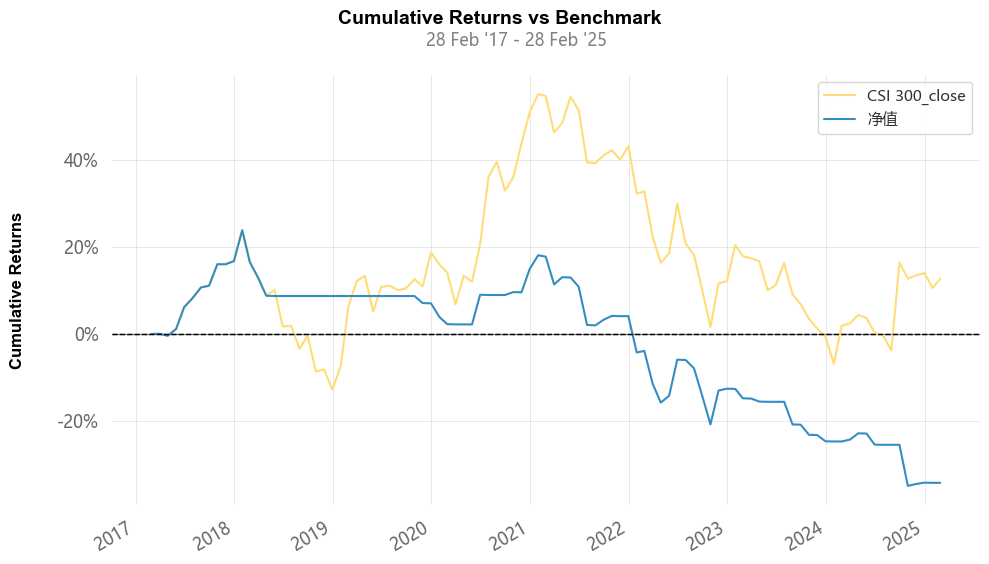

                                                         2017      2018  \
Annualized Return                                    0.135558 -0.052153   
Annualized Volatility                                0.292731  0.456535   
Information Ratio                                   -0.316228  0.467288   
Win Rate                                             0.727273  0.083333   
Maximum Drawdown Rate                               -0.004714 -0.121910   
Excess Net Value                                    -0.000495  0.184568   
Annualized Excess Return                            -0.000350  0.164236   
Excess Drawdown Level                               -0.000425 -0.031297   
Return Volatility Ratio                              0.463082 -0.114236   
Return Drawdown Ratio                              -28.755338  0.427796   
Longest Loss Duration (Months)                       0.050000  0.550000   
Loss Time Ratio                                      0.071111  1.000000   
Probability of Exceeding 

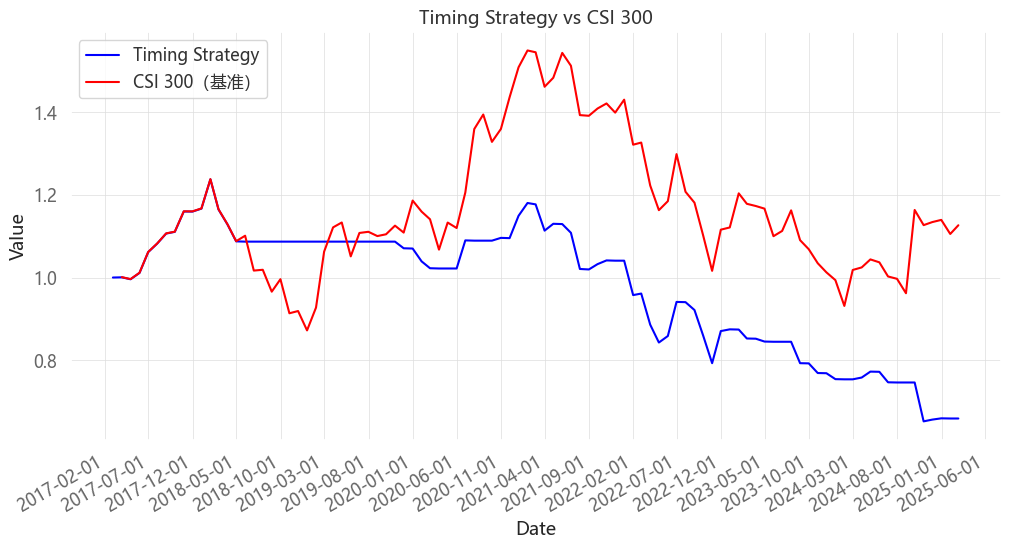

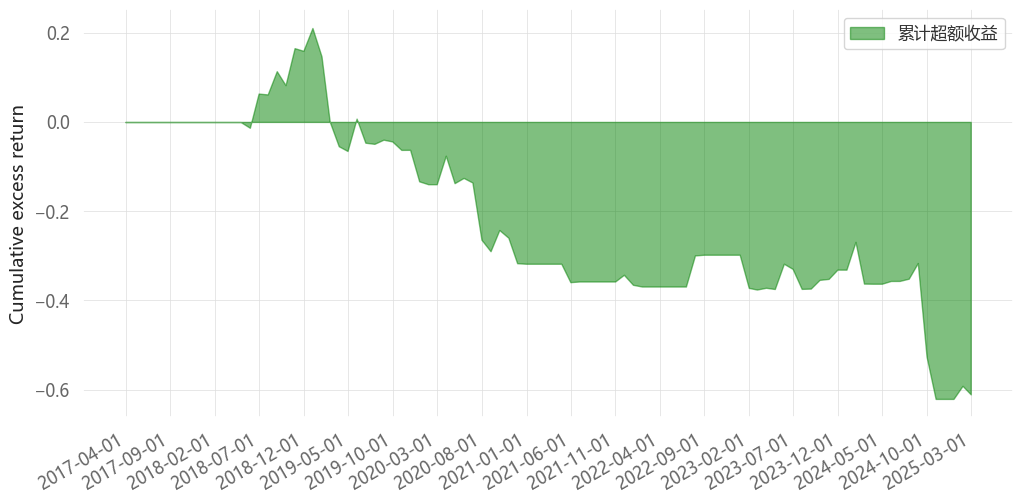

In [ ]:
df_position = pd.read_excel(r'C:\QPS\df_position.xlsx')
df_position.drop(columns=['Unnamed: 0'], inplace=True)
df_position = df_position.set_index('月份')
df_position.index = pd.to_datetime(df_position.index, format='%Y-%m').to_period('M').to_timestamp(how='end')
df_longshort = int_index_to_datetime(df_position)
df_longshort.index = df_longshort.index.strftime('%Y-%m-%d')
df_longshort.index = pd.to_datetime(df_longshort.index)

df_longshort['transaction_fee']=0.0 #初始化交易费用为0
# 计算仓位变动
for i in range(1, len(df_longshort)):
    previous_position = df_longshort.iloc[i-1]['Position']
    current_position = df_longshort.iloc[i]['Position']
    
    # 计算交易费用
    if previous_position != current_position:
        df_longshort['transaction_fee'].iloc[i] = transaction_fee_rate  * abs(current_position - previous_position)
        # df_longshort['transaction_fee'].iloc[i] = transaction_fee_rate
    else:
        df_longshort['transaction_fee'].iloc[i] = 0
    
strategy_longshort = backtest_longshort(start_date='2017-02-01', end_date=end_date,df_timing = df_longshort, index_code=index_code,positive = 0)
# strategy_longshort = backtest_longshort(start_date='2022-01-01', end_date=end_date,df_timing = df_longshort, index_code=index_code,positive = 0)
# 策略收益率和基准收益率
strategy_returns = strategy_longshort.df_merged['净值'].pct_change(1)
benchmark_returns = strategy_longshort.df_merged[f'{strategy_longshort.get_index_name(strategy_longshort.index_code)}_close'].pct_change(1)
risk_free_rate = 0.02  # 假设年化无风险利率为2%

# 调用analyze_performance方法来分析表现
performance_metrics = strategy_longshort.analyze_performance(strategy_returns, benchmark_returns, risk_free_rate)
result = strategy_longshort.calculate_performance()
print(result)